In the world of business, understanding why customers leave is as crucial as knowing why they stay. Customer churn is a silent killer of growth, and this dataset offers a window into the factors that might influence a customer's decision to leave. Let's dive into the data and see what insights we can uncover.

### Table of Contents
1. [Data Overview](#data-overview)
2. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
3. [Data Preprocessing](#data-preprocessing)
4. [Predictive Modeling](#predictive-modeling)
5. [Conclusion and Future Work](#conclusion-and-future-work)

## Data Overview

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/customer-churn/Customer Churn new.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited
0,747,15787619,Hsieh,844,France,Male,18,2,160980.03,145936.28,0
1,1620,15770309,McDonald,656,France,Male,18,10,151762.74,127014.32,0
2,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,71811.90,0
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,128743.80,197322.13,0
4,2137,15621893,Bellucci,727,France,Male,18,4,133550.67,46941.41,0


## Exploratory Data Analysis

In [2]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [3]:
# Summary statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000,1.000000


### Distribution of Numerical Features

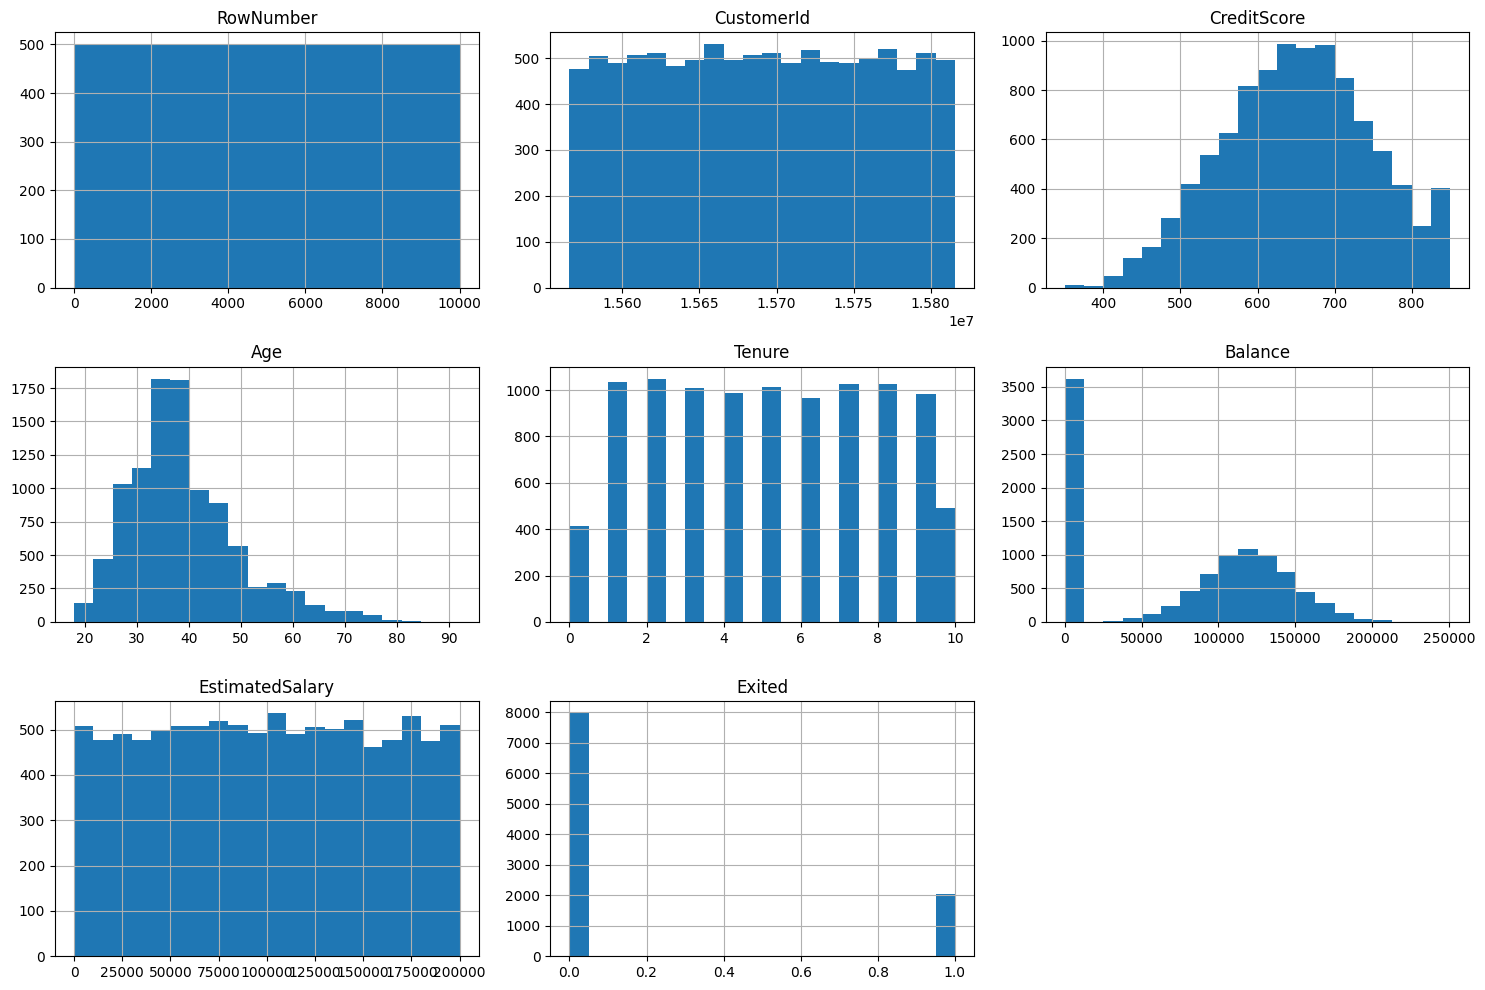

In [4]:
# Plot histograms for numerical features
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Correlation Heatmap

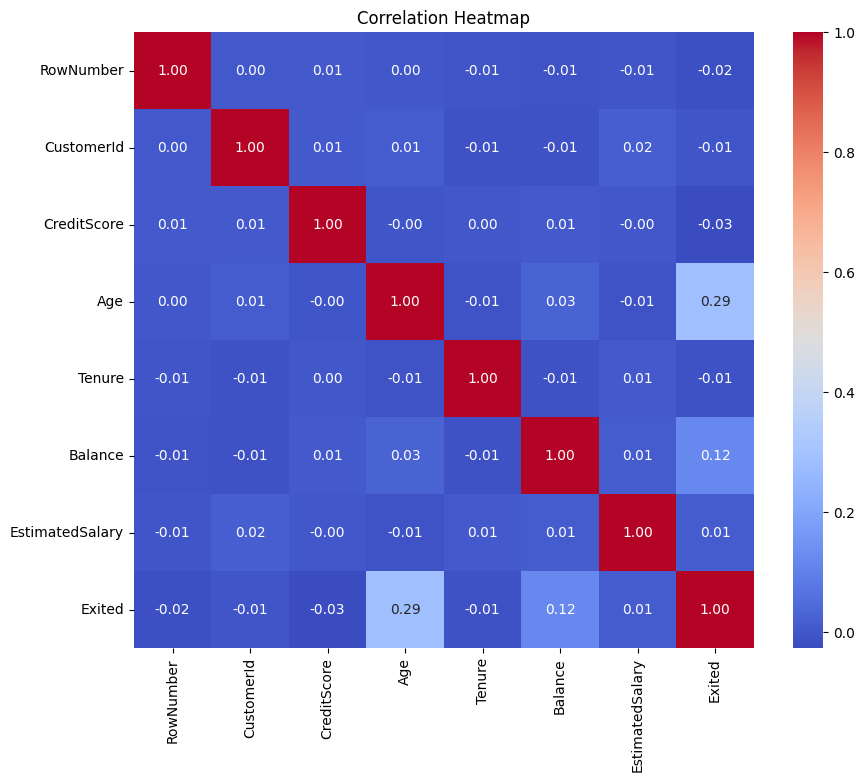

In [5]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

In [6]:
# Drop unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the preprocessed dataset
df.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,844,18,2,160980.03,145936.28,0,False,False,True
1,656,18,10,151762.74,127014.32,0,False,False,True
2,570,18,4,82767.42,71811.90,0,False,False,False
3,716,18,3,128743.80,197322.13,0,True,False,False
4,727,18,4,133550.67,46941.41,0,False,False,True


## Predictive Modeling

In [7]:
# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.8175,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89      1590\n           1       0.61      0.30      0.40       410\n\n    accuracy                           0.82      2000\n   macro avg       0.73      0.62      0.65      2000\nweighted avg       0.79      0.82      0.79      2000\n')

## Conclusion and Future Work

In this notebook, we explored the customer churn dataset and built a predictive model to identify customers likely to churn. The Random Forest Classifier provided a reasonable accuracy, but there's always room for improvement. Future work could involve hyperparameter tuning, exploring other algorithms, or incorporating additional features to enhance the model's performance.

If you found this notebook insightful, consider giving it an upvote. Your support helps me continue to create detailed and engaging analyses.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)